In [1]:
! pip install pytesseract Pillow

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable

ERROR: To modify pip, please run the following command:
c:\Program Files\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


In [4]:
import os
from PIL import Image, ImageFilter, ImageEnhance

def enhanced_preprocess_image(image):
    image = image.convert('L')
    image = image.filter(ImageFilter.GaussianBlur(radius=1))
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2)
    image = image.point(lambda x: 0 if x < 128 else 255, '1')
    image = image.resize([2 * dim for dim in image.size], Image.Resampling.LANCZOS)
    return image

def process_directory(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(input_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            file_path = os.path.join(input_directory, filename)
            try:
                image = Image.open(file_path)
                preprocessed_image = enhanced_preprocess_image(image)
                preprocessed_image.save(os.path.join(output_directory, filename))
                print(f'Processed and saved: {filename}')
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

input_directory_path = r'C:\Users\sumit\Desktop\HW Project\img_dataset'
output_directory_path = r'C:\Users\sumit\Desktop\HW Project\processed_images'

process_directory(input_directory_path, output_directory_path)

Processed and saved: photo_6246605594014367033_x.jpg


Processed and saved: photo_6248923029518268536_y.jpg
Processed and saved: photo_6248923029518268537_x.jpg
Processed and saved: photo_6248923029518268538_y.jpg
Processed and saved: photo_6248923029518268539_y.jpg
Processed and saved: photo_6248923029518268540_x.jpg
Processed and saved: photo_6248923029518268541_y.jpg
Processed and saved: photo_6248923029518268542_y.jpg
Processed and saved: photo_6248923029518268543_x.jpg
Processed and saved: photo_6248923029518268544_y.jpg
Processed and saved: photo_6248923029518268545_x.jpg
Processed and saved: photo_6248923029518268546_y.jpg
Processed and saved: photo_6248923029518268547_y.jpg
Processed and saved: photo_6248923029518268548_y.jpg
Processed and saved: photo_6248923029518268549_y.jpg
Processed and saved: photo_6248923029518268550_y.jpg
Processed and saved: photo_6248923029518268551_y.jpg
Processed and saved: photo_6248923029518268552_y.jpg
Processed and saved: photo_6248923029518268553_y.jpg
Processed and saved: photo_6248923029518268554

In [ ]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import numpy as np

In [ ]:
table1_path = 'table1.csv'
table2_path = 'table2.csv'
food_substances_path = 'FoodSubstances.csv'

table1 = pd.read_csv(table1_path)
table2 = pd.read_csv(table2_path)
food_substances = pd.read_csv(food_substances_path)

table1.head(), table2.head(), food_substances.head()



(          Ingredient                          Nutrition/Health Benefits  \
 0  whole wheat flour                                      High in fiber   
 1               rice  Vit B, Mg, Iron, Provides energy, supports ner...   
 2             quinoa  Complete protein, Supports metabolism, gluten-...   
 3             millet   Antioxidants, Supports heart health, gluten-free   
 4    sorghum (jowar)  Antioxidants, Fiber, Supports blood sugar cont...   
 
    Healthiness Score  
 0                  7  
 1                  5  
 2                  9  
 3                  7  
 4                  8  ,
               Ingredient                                          Nutrition  \
 0          potato flakes  Vit C, B6, Quick energy source, supports heart...   
 1  wheat flour (refined)                                     Enriched Vit B   
 2             rice flour                                        Gluten-free   
 3             corn flour                                       Antioxidants 

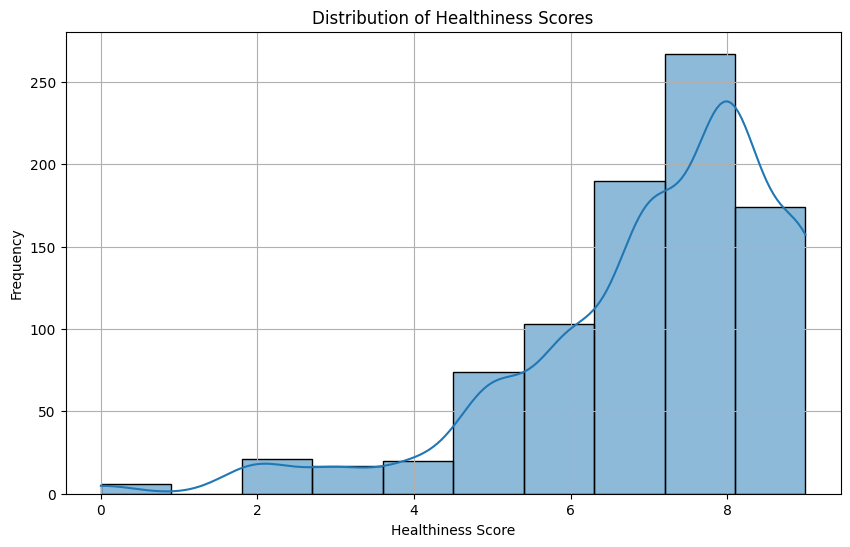

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

healthiness_scores_combined = pd.concat([
    table1['Healthiness Score'],
    table2['HealthinessScore']
], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(healthiness_scores_combined, kde=True, bins=10)
plt.title('Distribution of Healthiness Scores')
plt.xlabel('Healthiness Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

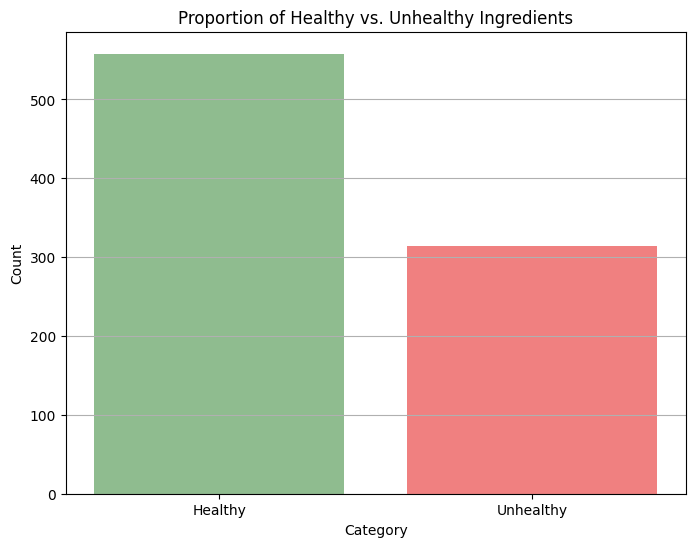

In [ ]:
total_healthy = table1.shape[0] 
total_unhealthy = table2.shape[0]  

categories = ['Healthy', 'Unhealthy']
counts = [total_healthy, total_unhealthy]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['#8fbc8f', '#f08080'])
plt.title('Proportion of Healthy vs. Unhealthy Ingredients')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

def capitalize_first_letter(text):
    return ' '.join(word.capitalize() for word in text.split())

def capitalize_dataframe_text(df):
    for column in df.columns:
        if df[column].dtype == object:
            df[column] = df[column].apply(lambda x: capitalize_first_letter(x) if isinstance(x, str) else x)
    return df

In [ ]:
def search_ingredient_data(ingredients, datasets):
    results = {name: [] for name in datasets.keys()}
    healthiness_scores = []

    vectorizer = TfidfVectorizer()

    for user_ingredient in ingredients:
        processed_user_ingredient = preprocess_text(user_ingredient)

        for name, dataset in datasets.items():
            dataset_ingredients = dataset['Ingredient'].apply(preprocess_text)
            ingredients_list = dataset_ingredients.tolist()

            ingredients_list.append(processed_user_ingredient)
            tfidf_matrix = vectorizer.fit_transform(ingredients_list)
            cosine_sim = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1])

            best_match_idx = cosine_sim.argmax()
            best_match_score = cosine_sim[0, best_match_idx]

            if best_match_score > 0.5:
                matched_row = dataset.iloc[best_match_idx]
                match_data = matched_row.drop(['Ingredient'], errors='ignore').to_dict()
                match_data['Ingredient'] = capitalize_first_letter(user_ingredient)
                results[name].append(match_data)
                
                if 'HealthinessScore' in matched_row:
                    healthiness_scores.append(matched_row['HealthinessScore'])

    return results, np.mean(healthiness_scores) if healthiness_scores else None


In [ ]:
import pandas as pd

def process_single_ocr_text_file(ocr_text_file_path):
    """Processes a single OCR text file for ingredient data."""
    encodings = ['utf-8', 'iso-8859-1', 'windows-1252']
    text = None
    
    for encoding in encodings:
        try:
            with open(ocr_text_file_path, 'r', encoding=encoding) as file:
                text = file.read()
            break
        except UnicodeDecodeError:
            continue

    ingredients = [ingredient.strip() for ingredient in text.split(',')]
    datasets = {'Table 1': table1, 'Table 2': table2, 'Food Substances': food_substances}

    ingredient_data, overall_healthiness_score = search_ingredient_data(ingredients, datasets)

    for dataset_name, data_list in ingredient_data.items():
        if data_list:
            print(f"Data for ingredients in {dataset_name}:")
            df = pd.DataFrame(data_list)
            
            if 'Ingredient' in df.columns:
                df['Ingredient'] = df['Ingredient'].astype(str) + df.groupby('Ingredient').cumcount().astype(str).replace('0', '')
                df = df.set_index('Ingredient')

            if dataset_name == 'Table 2':
                df = df.drop(columns=['HealthinessScore'], errors='ignore')

            df = capitalize_dataframe_text(df)  
            display(df.style.set_table_styles([
                {'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('color', 'black')]}
            ]).set_properties(**{
                'background-color': 'white', 
                'color': 'black', 
                'border': '1px solid black'
            }))
            print('\n')

    if overall_healthiness_score is not None:
        print(f"Overall healthiness percentage of the product: {overall_healthiness_score * 10:.2f}%")
    else:
        print("No healthiness scores available for the ingredients found.")

In [ ]:
ocr_text_file_path = r'C:\Users\sumit\Desktop\HW Project\processed_images\test7.txt'  # Update this path
process_single_ocr_text_file(ocr_text_file_path)

Data for ingredients in Table 1:


,Nutrition/Health Benefits,Healthiness Score
Ingredient,,
Rice Bran Oil),"Fiber, Antioxidants, Lowers Cholesterol, Adds Nutrients To Baked Goods",7
Dehydrated Vegetable (beetroot Powder),"Folate, Fiber, Blood Pressure Control, Stamina",9
Butter Milk Powder,"Calcium, Vitamins",7




Data for ingredients in Table 2:


,Nutrition,Health Risks/Disease Concerned
Ingredient,,
Edible Vegetable Oil (palmolein Oil,Vit E,High In Calories; Overconsumption Risk
Sugar,Nil,"Risk Of Obesity, Diabetes"
Lodised Salt,Nil,High Blood Pressure Risk
Butter Milk Powder,Nil,High In Saturated Fat




Data for ingredients in Food Substances:


,Effects
Ingredient,
Rice Bran Oil),"Lubricant Or Release Agent, Masticatory Substance"
Sugar,"Flavor Enhancer, Flavoring Agent Or Adjuvant, Nutritive Sweetener"
Butter Milk Powder,"Anticaking Agent Or Free-flow Agent, Drying Agent, Flavor Enhancer, Flavoring Agent Or Adjuvant, Formulation Aid, Humectant, Malting Or Fermenting Aid, Nutrient Supplement, Stabilizer Or Thickener, Texturizer"




Overall healthiness percentage of the product: 35.00%


Training Accuracy: 0.9416774193548387
Training Loss: 0.05832258064516127
Testing Accuracy: 0.9287925696594427
Testing Loss: 0.07120743034055732


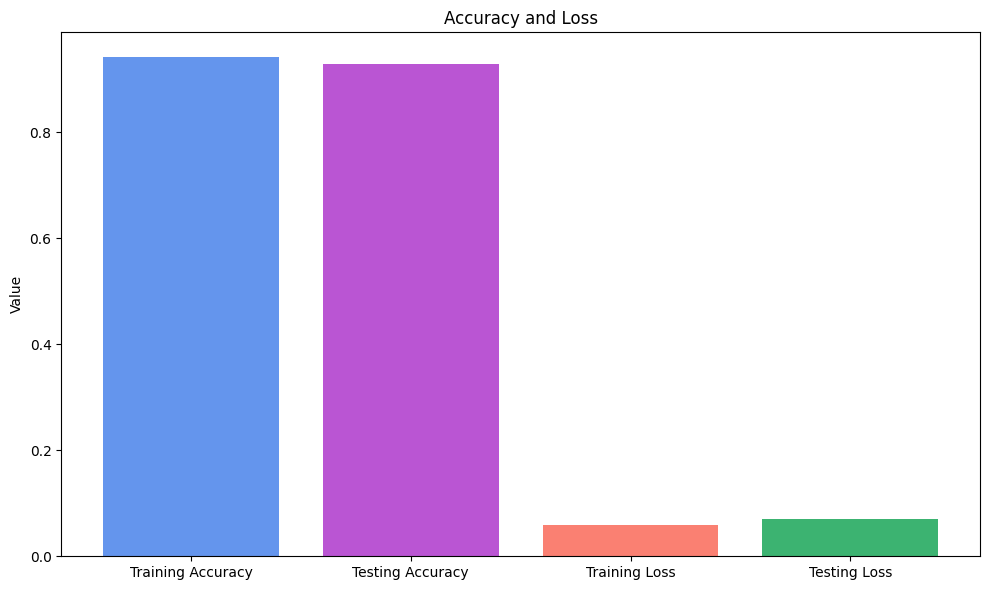

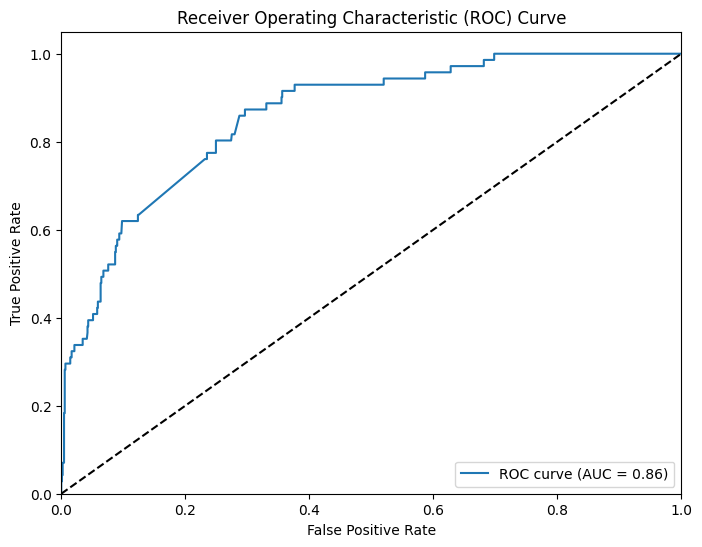

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

table1 = pd.read_csv('table1.csv')
table2 = pd.read_csv('table2.csv')
food_substances = pd.read_csv('FoodSubstances.csv')

ingredient_dataset = pd.concat([table1, table2, food_substances], ignore_index=True)

X = ingredient_dataset['Ingredient']
y = ingredient_dataset['HealthinessScore'].apply(lambda x: 1 if x > 0.5 else 0)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vectors, y_train)

y_train_pred = model.predict(X_train_vectors)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = 1 - train_accuracy

y_test_pred = model.predict(X_test_vectors)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = 1 - test_accuracy

print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)
print("Testing Accuracy:", test_accuracy)
print("Testing Loss:", test_loss)

y_test_pred_proba = model.predict_proba(X_test_vectors)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

labels = ['Training Accuracy', 'Testing Accuracy', 'Training Loss', 'Testing Loss']
values = [train_accuracy, test_accuracy, train_loss, test_loss]
colors = ['cornflowerblue', 'mediumorchid', 'salmon', 'mediumseagreen']

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)
plt.title('Accuracy and Loss')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
